<a href="https://colab.research.google.com/github/Leonardo-Gaspar/Machine_Learning/blob/main/CHECKPOINT_02_PARTE_01_KERAS_2TDSPS_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHECKPOINT 02 (Parte 01): Modelos com Redes Neurais com Keras**

## Disciplina:  Disruptive Architectures: IOT, IOB e GENERATIVE AI

## Turmas: 2TDSPS

## Professor: André Tritiack

## Pontuação Máxima: 4.00 pontos



## INSIRA NESSA CÉLULA O NOME E O RM DOS INTEGRANTES DO GRUPO

# Participantes:

##Caio Eduardo Martins - RM554025
##Julia Mariano - RM552713
##Leonardo Gaspar - RM553383








# **Introdução**

Durante o semestre, estudamos o uso de algoritmos de **Aprendizado de Máquina Supervisionado**.

- Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

- Máquina de Vetor Suporte (SVM)

https://scikit-learn.org/stable/modules/svm.html#classification

- Árvore de Decisão (Decision Tree)

https://scikit-learn.org/stable/modules/tree.html

- Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações.

Nos exercícios a seguir, você e seu grupo receberão conjuntos de dados e precisarão aplicar duas dessas técnicas em cada exercício, utilizando como métrica a acurácia.

Em seguida, utilizando a biblioteca Keras, crie modelos de Redes Neurais para classificação e compare os resultados.

Altere o número de neurônios, a quantidade de camadas e as funções de ativação para comparar os resultados.

Use o exemplo demonstrado em aula para criar sua solução.

Importante: Somente serão aceitos arquivos .ipynb comentados, com justificativas e conclusões sobre as implementações

------------------
## <font color='red'> Atenção</fonte>:

A seguir são apresentados dois datasets de pessoas reais.

Ao se trabalhar com dados de pessoas devemos considerar a origem e os preceitos **bioéticos** envolvidos em sua coleta, construção e utilização.

Além disso, é boa prática que os dados estejam anonimizados.

----------------------
# **QUESTÃO 01**

## **Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral**

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL).

O dataset foi disponibilizado em um arquivo .csv, em anexo da tarefa.

Maiores informações disponíveis em https://www.openml.org/d/1523

## Parte 1: Importação de bibliotecas

In [48]:
# Bibliotecas para manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Bibliotecas para algoritmos de aprendizado supervisionado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas para métricas de avaliação
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Bibliotecas para redes neurais
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Configuração dos gráficos
sns.set(style="whitegrid")

# Parte 2: Importação dos dados e Análise Exploratória


In [49]:
# Carregar o dataset
df = pd.read_csv('/content/questao_01.csv')

# Exibir as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())
print('')
print('')

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())
print('')
print('')

# Estatísticas descritivas do dataset
print("\nEstatísticas descritivas:")
print(df.describe())

Primeiras linhas do dataset:
   Unnamed: 0         V1         V2         V3         V4          V5  \
0           0  63.027818  22.552586  39.609117  40.475232   98.672917   
1           1  39.056951  10.060991  25.015378  28.995960  114.405425   
2           2  68.832021  22.218482  50.092194  46.613539  105.985136   
3           3  69.297008  24.652878  44.311238  44.644130  101.868495   
4           4  49.712859   9.652075  28.317406  40.060784  108.168725   

          V6   diagnostic  
0  -0.254400  Disk Hernia  
1   4.564259  Disk Hernia  
2  -3.530317  Disk Hernia  
3  11.211523  Disk Hernia  
4   7.918501  Disk Hernia  



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  310 non-null    int64  
 1   V1          310 non-null    float64
 2   V2          310 non-null    float64
 3   V3          310 


Distribuição das classes:
diagnostic
Spondylolisthesis    150
Normal               100
Disk Hernia           60
Name: count, dtype: int64


<ipython-input-50-faa92cdea44e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnostic', data=df, palette='Set2')


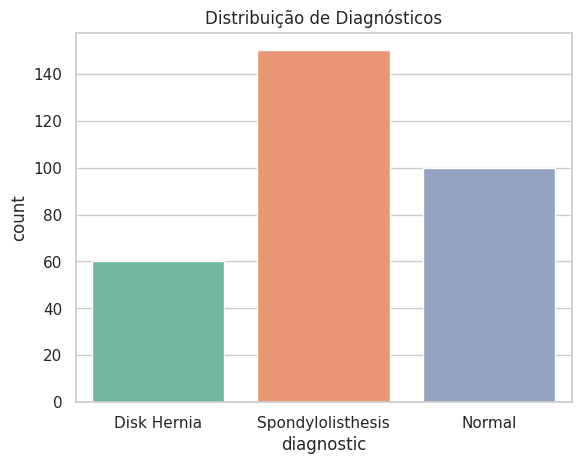

In [50]:
# Verificar a distribuição das classes no dataset
print("\nDistribuição das classes:")
print(df['diagnostic'].value_counts())

# Visualização da distribuição das classes
sns.countplot(x='diagnostic', data=df, palette='Set2')
plt.title("Distribuição de Diagnósticos")
plt.show()

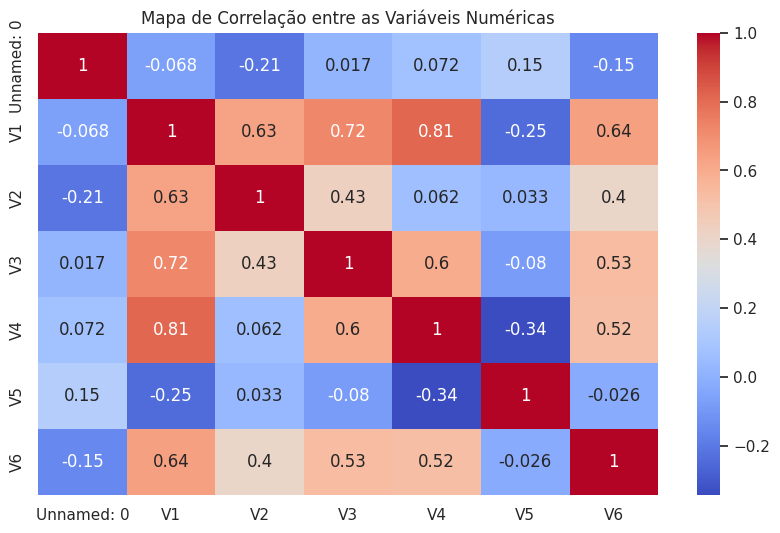

In [51]:
# Selecionar apenas colunas numéricas para calcular a correlação
df_numeric = df.select_dtypes(include=[np.number])

# Mapa de calor para verificar a correlação entre as variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre as Variáveis Numéricas")
plt.show()

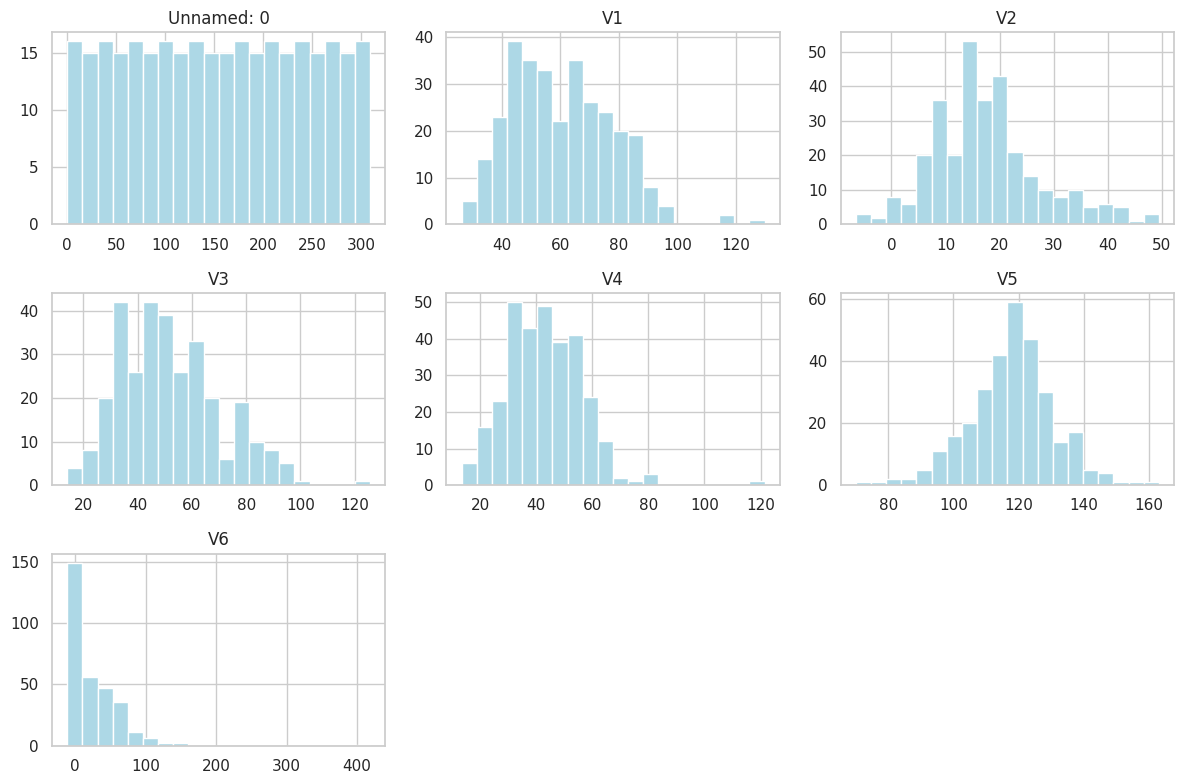

In [52]:
# Plotar histogramas para os atributos biomecânicos
df.hist(bins=20, figsize=(12, 8), color='lightblue')
plt.tight_layout()
plt.show()

# Parte 3: Pré Processamento




In [53]:
# Codificar o diagnóstico para valores numéricos
le = LabelEncoder()
df['diagnostic'] = le.fit_transform(df['diagnostic'])

# Verificar os valores codificados
print(df['diagnostic'].unique())

[0 2 1]


# Parte 4: Criação das variáveis com os dados de entrada (X) e dados de saída (y) e separação de dados de treinamento e teste.

In [54]:
# X contém todas as colunas que não são a variável alvo
X = df.drop('diagnostic', axis=1)

# y contém apenas a coluna da variável alvo (diagnóstico)
y = df['diagnostic']

# Verificar as dimensões de X e y
print(f"Dimensão de X: {X.shape}")
print(f"Dimensão de y: {y.shape}")

Dimensão de X: (310, 7)
Dimensão de y: (310,)


In [55]:
# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar os tamanhos dos conjuntos de treino e teste
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (248, 7)
Tamanho de X_test: (62, 7)
Tamanho de y_train: (248,)
Tamanho de y_test: (62,)


In [56]:
# Normalizar os dados (se necessário)
scaler = StandardScaler()

# Ajustar o scaler nos dados de treino e transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste
X_test_scaled = scaler.transform(X_test)

print("Normalização concluída.")

Normalização concluída.


# Parte 5.1: Criação do primeiro modelo, utilizando o primeiro algoritmo.






In [57]:
# Instanciar o modelo com um número k de vizinhos (por exemplo, 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com os dados de treino
knn.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar o modelo usando a acurácia
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do modelo kNN: {accuracy_knn:.2f}")

# Gerar um relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn))

# Gerar a matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nMatriz de Confusão:\n", conf_matrix_knn)

Acurácia do modelo kNN: 0.98

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        18
           2       0.97      1.00      0.98        32

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.99        62
weighted avg       0.98      0.98      0.98        62


Matriz de Confusão:
 [[12  0  0]
 [ 0 17  1]
 [ 0  0 32]]


# Parte 5.2: Criação do segundo modelo, utilizando o segundo algoritmo.



In [58]:
# Instanciar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treino
rf_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliar o modelo usando a acurácia
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.2f}")

# Gerar um relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

# Gerar a matriz de confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusão:\n", conf_matrix_rf)

Acurácia do modelo Random Forest: 1.00

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        32

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Matriz de Confusão:
 [[12  0  0]
 [ 0 18  0]
 [ 0  0 32]]


# Parte 5.3: Criação da arquitetura e treinamento do modelo de Redes Neurais com Keras

In [59]:
# Definir a arquitetura da Rede Neural
model = Sequential()

# Adicionar camadas
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Primeira camada oculta
model.add(Dense(units=32, activation='relu'))  # Segunda camada oculta
model.add(Dense(units=3, activation='softmax'))  # Camada de saída (3 classes)

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping])

# Avaliar o desempenho do modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Acurácia do modelo de Rede Neural: {accuracy:.2f}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6617 - loss: 0.9280 - val_accuracy: 0.8600 - val_loss: 0.7084
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8137 - loss: 0.7146 - val_accuracy: 0.8800 - val_loss: 0.5379
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9020 - loss: 0.5592 - val_accuracy: 0.9000 - val_loss: 0.4098
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8877 - loss: 0.4026 - val_accuracy: 0.9200 - val_loss: 0.3160
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9501 - loss: 0.2890 - val_accuracy: 0.9200 - val_loss: 0.2441
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9518 - loss: 0.2545 - val_accuracy: 0.9200 - val_loss: 0.2064
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9660 - loss: 0.2229 - val_accuracy: 0.9400 - val_loss: 0.1672
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9955 - loss: 0.1189 - val_accuracy: 0.9600 - val_loss: 0.

# Parte 6: Comparação das métricas dos modelos (utilize somente a acurácia nesse exemplo)

In [60]:
# Armazenar as acurácias dos modelos
model_metrics = {
    'Modelo': ['KNN', 'Regressão Logística', 'SVM', 'Árvore de Decisão', 'Random Forest', 'Rede Neural'],
    'Acurácia': [accuracy_knn, accuracy_logistic, accuracy_svm, accuracy_tree, accuracy_rf, accuracy]
}

# Criar um DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Exibir a tabela de métricas
print(metrics_df)

                Modelo  Acurácia
0                  KNN  0.983871
1  Regressão Logística  0.753247
2                  SVM  1.000000
3    Árvore de Decisão  0.967742
4        Random Forest  1.000000
5          Rede Neural  0.983871


----------------------
# **QUESTÃO 02**

## **Diagnóstico médico: Diabetes no povo Pima**

Esse dataset contém dados sobre incidência de diabetes em mulheres do Povo Pima (índios nativos norte americanos originários do atual Estado do Arizona). Contém 8 atributos biomédicos para 768 entradas anonimizadas, sendo 500 testados negativo para diabetes e 268 testados positivo para diabetes.

Faça o download do dataset:

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# ***Parte 1: Importação das Bibliotecas***

In [62]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# ***Parte 2: Importação dos Dados e Análise Exploratória***

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

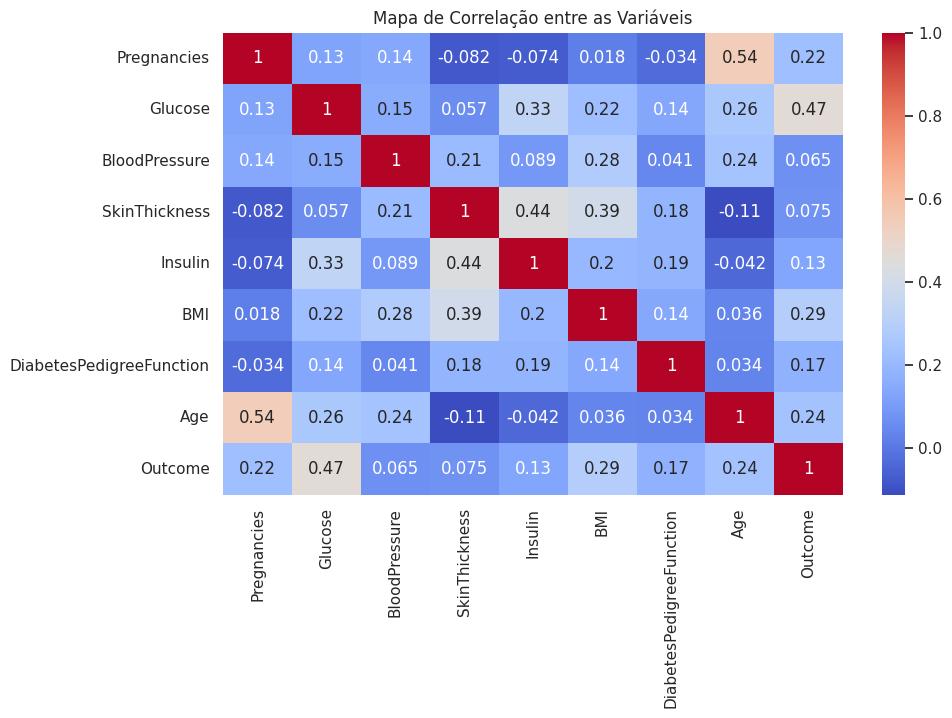

In [63]:
# Carregar o conjunto de dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

# Visualização das primeiras linhas
print(df.head())

# Verificação de informações do dataset
print(df.info())

# Mapa de calor para verificar a correlação entre as variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()

# ***Parte 3: Pré-processamento***

In [64]:
# Verificar e tratar valores ausentes
print(df.isnull().sum())

# Separar dados de entrada (X) e saída (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir o dataset em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# ***Parte 4: Criação do Primeiro Modelo (kNN)***

In [65]:
# Criação do modelo K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Calcular a acurácia
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia KNN: {accuracy_knn}")

Acurácia KNN: 0.6948051948051948


# ***Parte 5: Criação do Segundo Modelo (Regressão Logística)***

In [66]:
# Criação do modelo de Regressão Logística
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

# Calcular a acurácia
y_pred_logistic = logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Acurácia Regressão Logística: {accuracy_logistic}")

Acurácia Regressão Logística: 0.7532467532467533


# ***Parte 6: Criação da Rede Neural com Keras***

In [67]:
# Criação da Rede Neural
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Saída para classificação binária

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Avaliação do modelo
_, accuracy_nn = model.evaluate(X_test, y_test)
print(f"Acurácia Rede Neural: {accuracy_nn}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7493 - loss: 0.5852
Acurácia Rede Neural: 0.7597402334213257


# ***Parte 7: Comparação das Métricas dos Modelos***

In [68]:
# Comparação das acurácias
model_metrics = {
    'Modelo': ['KNN', 'Regressão Logística', 'Rede Neural'],
    'Acurácia': [accuracy_knn, accuracy_logistic, accuracy_nn]
}

metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)

                Modelo  Acurácia
0                  KNN  0.694805
1  Regressão Logística  0.753247
2          Rede Neural  0.759740


# ***Apresentação do relatório/tabela com o resumo das métricas de cada modelo***

In [69]:
# Calcular as métricas para cada modelo
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_nn = confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32"))

# Relatório de classificação
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
report_nn = classification_report(y_test, (model.predict(X_test) > 0.5).astype("int32"), output_dict=True)

# Resumo das métricas
summary_metrics = {
    'Modelo': ['KNN', 'Regressão Logística', 'Rede Neural'],
    'Acurácia': [accuracy_knn, accuracy_logistic, accuracy_nn],
    'Precisão': [report_knn['1']['precision'], report_logistic['1']['precision'], report_nn['1']['precision']],
    'Revocação': [report_knn['1']['recall'], report_logistic['1']['recall'], report_nn['1']['recall']],
    'F1-Score': [report_knn['1']['f1-score'], report_logistic['1']['f1-score'], report_nn['1']['f1-score']],
}

metrics_df = pd.DataFrame(summary_metrics)

# Exibir a tabela com as métricas
print(metrics_df)

# Matriz de Confusão
print("Matriz de Confusão - KNN:\n", confusion_knn)
print("Matriz de Confusão - Regressão Logística:\n", confusion_logistic)
print("Matriz de Confusão - Rede Neural:\n", confusion_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
                Modelo  Acurácia  Precisão  Revocação  F1-Score
0                  KNN  0.694805  0.583333   0.509091  0.543689
1  Regressão Logística  0.753247  0.649123   0.672727  0.660714
2          Rede Neural  0.759740  0.680000   0.618182  0.647619
Matriz de Confusão - KNN:
 [[79 20]
 [27 28]]
Matriz de Confusão - Regressão Logística:
 [[79 20]
 [18 37]]
Matriz de Confusão - Rede Neural:
 [[83 16]
 [21 34]]
